# Image Classifier
Using the FashionMNIST Image datasets

## Importing Libraries

In [1]:
# import libraries

import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

## Getting a dataset

In [2]:
# Getting daataset
from torchvision import datasets

trainDataset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform = ToTensor(),
    target_transform=None
)

testDataset = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(trainDataset), len(testDataset)

(60000, 10000)

In [4]:
image, label = trainDataset[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
classNames = trainDataset.classes
classNames

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
classToIdx = trainDataset.class_to_idx
classToIdx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### Checking Image and Label Shape

In [7]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

### Visualizing 

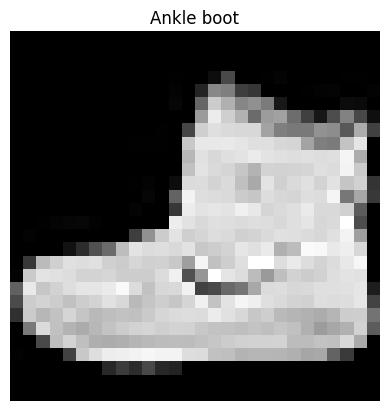

In [8]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(classNames[label])
plt.axis(False);

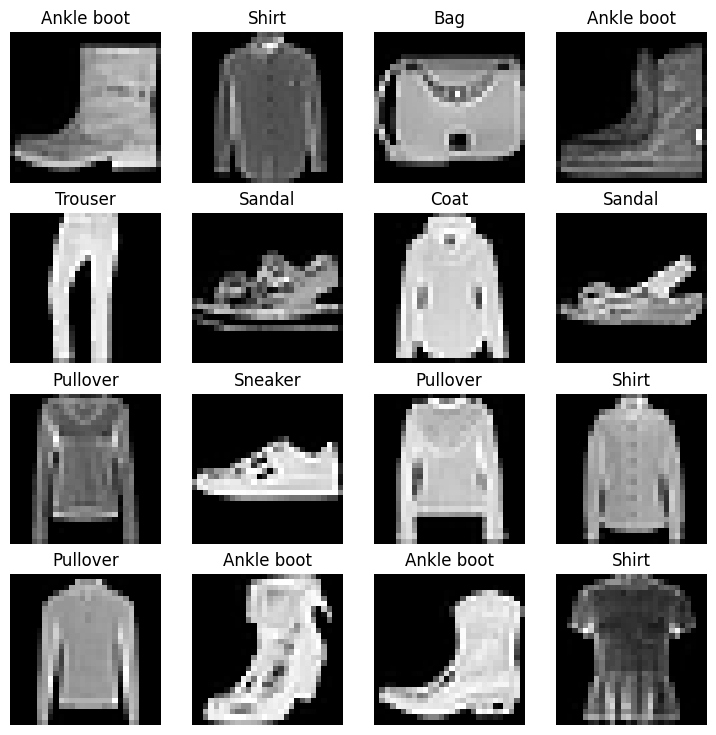

In [9]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols =  4,4
for i in range(1, rows*cols+1):
  randomIdx = torch.randint(0, len(trainDataset), size=[1]).item()
  img,label = trainDataset[randomIdx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(classNames[label])
  plt.axis(False);

In [10]:
## Preparing dataloader

from torch.utils.data import DataLoader

# set batch size
BATCH_SIZE = 32

# dataLoading...
trainDataloader = DataLoader(trainDataset, batch_size=BATCH_SIZE, shuffle=True)

testDataloader = DataLoader(testDataset, batch_size=BATCH_SIZE, shuffle=False)

testDataloader, trainDataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f2a0c5e68f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f2a0c5e7cd0>)

In [11]:
len(trainDataloader), len(testDataloader)

(1875, 313)

In [12]:
trainXBatch, trainYBatch = next(iter(trainDataloader))
trainXBatch.shape, trainYBatch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

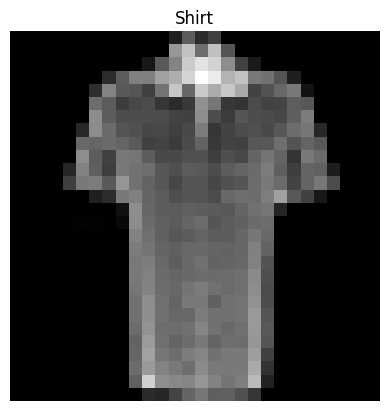

In [13]:
# Show a sample
torch.manual_seed(42)
randomIdx = torch.randint(0, len(trainXBatch), size=[1]).item()
img, label = trainXBatch[randomIdx], trainYBatch[randomIdx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(classNames[label])
plt.axis(False);

## Modelling

Model zero a.k.a baseline model....

In [14]:
from torch import nn

class TimsFashionModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layerStack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self,x):
    return self.layerStack(x)

In [15]:
torch.manual_seed(42)

# setup model
model0 = TimsFashionModelV0(input_shape = 784, hidden_units=10,output_shape=len(classNames)).to("cpu")

model0

TimsFashionModelV0(
  (layerStack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [16]:
fakeX = torch.rand([1,1,28,28])
model0(fakeX)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [17]:
model0.state_dict()

OrderedDict([('layerStack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layerStack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layerStack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.313

### Setup loss, optimizer and evaluation metrics

In [18]:
!pip install torchmetrics
from torchmetrics import Accuracy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
optim = torch.optim.SGD(params=model0.parameters(),lr=0.1)
lossFn = nn.CrossEntropyLoss()

### Timing our experiments

In [20]:
from timeit import default_timer as timer

In [21]:
def printTrainTime(start:float, end:float, device: torch.device = None):
  '''
    Prints difference between start and end time
  '''

  totalTime = end - start
  print(f"train time is {totalTime:.3f}")
  return totalTime

In [22]:
st = timer()
et = timer()
printTrainTime(st,et)

train time is 0.000


3.347500000927539e-05

### Model Training loop

In [23]:
from tqdm.auto import tqdm

# set generator seed
torch.manual_seed(42)

trainTimeStart = timer()

# number of epochs
epochs = 10

# Training and evaluation loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}")

  # training
  trainLoss = 0

  # loop through batches
  for batch, (X,y) in enumerate(trainDataloader):
    model0.train()

    yPred = model0(X)

    loss = lossFn(yPred, y)
    trainLoss += loss

    optim.zero_grad()

    loss.backward()

    optim.step()

    if batch % 400 == 0:
      print(f"{batch * len(X)}/{len(trainDataloader.dataset)} samples")

  trainLoss /= len(trainDataloader)

  # testing
  testLoss = testAcc = 0
  model0.eval()

  with torch.inference_mode():
    for xTest,yTest in testDataloader:
      
      testPred = model0(xTest)

      testLoss += lossFn(testPred, yTest)

      accuracy = Accuracy(task="multiclass", num_classes=10)
      testAcc += accuracy(testPred.argmax(dim=1), yTest)


    testLoss /= len(testDataloader)

    testAcc /= len(testDataloader)

    print(f"Train loss : {trainLoss:.4f} | Test loss : {testLoss:.4f} | Test Acc:{testAcc}")

trainTimeEnd = timer()

totalTrainTime = printTrainTime(trainTimeStart,trainTimeEnd, str(next(model0.parameters()).device))




  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 0
0/60000 samples
12800/60000 samples
25600/60000 samples
38400/60000 samples
51200/60000 samples
Train loss : 0.5904 | Test loss : 0.5095 | Test Acc:0.8203873634338379
Epoch : 1
0/60000 samples
12800/60000 samples
25600/60000 samples
38400/60000 samples
51200/60000 samples
Train loss : 0.4763 | Test loss : 0.4799 | Test Acc:0.8319688439369202
Epoch : 2
0/60000 samples
12800/60000 samples
25600/60000 samples
38400/60000 samples
51200/60000 samples
Train loss : 0.4550 | Test loss : 0.4766 | Test Acc:0.8342651724815369
Epoch : 3
0/60000 samples
12800/60000 samples
25600/60000 samples
38400/60000 samples
51200/60000 samples
Train loss : 0.4425 | Test loss : 0.4631 | Test Acc:0.8374600410461426
Epoch : 4
0/60000 samples
12800/60000 samples
25600/60000 samples
38400/60000 samples
51200/60000 samples
Train loss : 0.4358 | Test loss : 0.4687 | Test Acc:0.8326677083969116
Epoch : 5
0/60000 samples
12800/60000 samples
25600/60000 samples
38400/60000 samples
51200/60000 samples
Train los

In [24]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [25]:
torch.manual_seed(42)
def evalModel(model : torch.nn.Module, dataLoader: torch.utils.data.DataLoader, lossFn: torch.nn.Module, accuracyFn, device=device):
  '''
    returns a dictionary containing the results of model predictions
  '''

  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in dataLoader:
      X,y = X.to(device), y.to(device)
      yPred = model(X)
      loss += lossFn(yPred, y)
      acc += accuracyFn(yPred.argmax(dim=1),y)

    loss /= len(dataLoader)
    acc /= len(dataLoader)

  return {"modelName": model.__class__.__name__,
            "modelLoss" : loss.item(),
            "modelAcc": acc.item()}

model0Results = evalModel(model0, testDataloader, lossFn, accuracy,"cpu")
model0Results



{'modelName': 'TimsFashionModelV0',
 'modelLoss': 0.46279820799827576,
 'modelAcc': 0.8364616632461548}

### Building Model with Non Linearity

In [26]:
class TimsFashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units : int, output_shape : int):
    super().__init__()
    self.layerStack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x:torch.Tensor):
    return self.layerStack(x)

In [27]:
torch.manual_seed(42)
model1 = TimsFashionMNISTModelV1(784,10,len(classNames)).to(device)

### Setup Loss, optimizer and evaluation metrics

In [28]:
lossFn = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)

### Model Training and Evaluation Functions

In [29]:
def trainStep(model : torch.nn.Module, dataLoader : torch.utils.data.DataLoader, lossFn : torch.nn.Module, optimizer : torch.optim.Optimizer, accuracyFn, device : torch.device = device):
  trainLoss, trainAcc = 0,0

  model.train()
  for batch, (X,y) in enumerate(dataLoader):
    X, y = X.to(device), y.to(device)

    yPred = model(X)

    loss = lossFn(yPred, y)

    trainLoss += loss
    trainAcc += accuracy(yPred.argmax(dim=1), y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
  

    if batch % 400 == 0:
      print(f"Looked into {batch * len(X)}/{len(dataLoader.dataset)} samples")

  trainLoss /= len(dataLoader)
  trainAcc /= len(dataLoader)
  print(f"Train Loss : {trainLoss:.5f} | Train Acc: {trainAcc:.5f}")


In [30]:
def testStep(model : torch.nn.Module, dataLoader: torch.utils.data.DataLoader, lossFn: torch.nn.Module, accuracy, device : torch.device = device):
  testLoss, testAcc = 0,0

  model.eval()

  with torch.inference_mode():
    for X, y in dataLoader:
      X, y = X.to(device), y.to(device)

      yPred = model(X)

      testLoss += lossFn(yPred, y)
      testAcc += accuracy(yPred.argmax(dim=1), y)

    testLoss /= len(dataLoader)
    testAcc /= len(dataLoader)

    print(f"Test Loss : {testLoss:.5f} | Test Acc : {testAcc:.5f}")

In [31]:
torch.manual_seed(42)

#Measuring time
trainTimeStart = timer()

epochs = 10

# Training and evaluation loop with their functions
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}")
  
  trainStep(model1, trainDataloader, lossFn, optimizer, accuracy.to(device))

  testStep(model1, testDataloader, lossFn, accuracy)

trainTimeEnd = timer()

totalTrainTime = printTrainTime(start=trainTimeStart, end=trainTimeEnd, device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 0
Looked into 0/60000 samples
Looked into 12800/60000 samples
Looked into 25600/60000 samples
Looked into 38400/60000 samples
Looked into 51200/60000 samples
Train Loss : 1.09199 | Train Acc: 0.61343
Test Loss : 0.95636 | Test Acc : 0.64996
Epoch : 1
Looked into 0/60000 samples
Looked into 12800/60000 samples
Looked into 25600/60000 samples
Looked into 38400/60000 samples
Looked into 51200/60000 samples
Train Loss : 0.78101 | Train Acc: 0.71928
Test Loss : 0.72227 | Test Acc : 0.73912
Epoch : 2
Looked into 0/60000 samples
Looked into 12800/60000 samples
Looked into 25600/60000 samples
Looked into 38400/60000 samples
Looked into 51200/60000 samples
Train Loss : 0.67027 | Train Acc: 0.75937
Test Loss : 0.68500 | Test Acc : 0.75020
Epoch : 3
Looked into 0/60000 samples
Looked into 12800/60000 samples
Looked into 25600/60000 samples
Looked into 38400/60000 samples
Looked into 51200/60000 samples
Train Loss : 0.64384 | Train Acc: 0.76523
Test Loss : 0.65079 | Test Acc : 0.76128
Epoc

In [32]:
len(trainDataloader.dataset)

60000

In [33]:
model0Results

{'modelName': 'TimsFashionModelV0',
 'modelLoss': 0.46279820799827576,
 'modelAcc': 0.8364616632461548}

In [34]:
model1Results = evalModel(model1, testDataloader, lossFn, accuracy)
model1Results

{'modelName': 'TimsFashionMNISTModelV1',
 'modelLoss': 0.43290942907333374,
 'modelAcc': 0.8482428193092346}

### Using CNN Models

In [35]:
class TimsFashionMNISTModelV2(nn.Module):
  '''
    A CNN Model to predict Fashion MNIST dataset Images
  '''

  def __init__(self, inputShape : int, hiddenUnits : int, outputShape : int):
    super().__init__()
    self.convBlock1 = nn.Sequential(
        nn.Conv2d(in_channels= inputShape,out_channels=hiddenUnits,stride=1,padding=1,kernel_size=3),
        nn.ReLU(),
        nn.Conv2d(in_channels=hiddenUnits, out_channels=hiddenUnits,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.convBlock2 = nn.Sequential (
        nn.Conv2d(in_channels=hiddenUnits, out_channels=hiddenUnits, kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hiddenUnits, out_channels=hiddenUnits,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hiddenUnits*7*7,out_features=outputShape)
    )

  def forward(self, x):
    x = self.convBlock1(x)
    #print(f"1st convo block shape: {x.shape}")
    x = self.convBlock2(x)
    #print(f"2st convo block shape: {x.shape}")
    x = self.classifier(x)
    #print(f"classifier block shape: {x.shape}")
    return x

In [36]:
torch.manual_seed(42)
model2 = TimsFashionMNISTModelV2(inputShape = 1, hiddenUnits=10,outputShape=len(classNames)).to(device)

### Testing model with dummy data

In [37]:
randImg = torch.randn(size=(1,28,28))

In [38]:
model2(randImg.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Loss function and Optimizer

In [39]:
# Although its the same as before, I wish to get used to the code workflow

lossFn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model2.parameters(),lr=0.1)

### Training CNN Model

In [40]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

trainTimeStart = timer()

epochs = 10

for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}")

  trainStep(model2, trainDataloader, lossFn, optimizer, accuracy)

  testStep(model2,testDataloader,lossFn,accuracy)

trainTimeEnd = timer()

totalTrainTime = printTrainTime(start=trainTimeStart, end=trainTimeEnd, device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 0
Looked into 0/60000 samples
Looked into 12800/60000 samples
Looked into 25600/60000 samples
Looked into 38400/60000 samples
Looked into 51200/60000 samples
Train Loss : 0.59528 | Train Acc: 0.78377
Test Loss : 0.39706 | Test Acc : 0.85533
Epoch : 1
Looked into 0/60000 samples
Looked into 12800/60000 samples
Looked into 25600/60000 samples
Looked into 38400/60000 samples
Looked into 51200/60000 samples
Train Loss : 0.36120 | Train Acc: 0.87005
Test Loss : 0.35322 | Test Acc : 0.86791
Epoch : 2
Looked into 0/60000 samples
Looked into 12800/60000 samples
Looked into 25600/60000 samples
Looked into 38400/60000 samples
Looked into 51200/60000 samples
Train Loss : 0.32518 | Train Acc: 0.88142
Test Loss : 0.32334 | Test Acc : 0.88169
Epoch : 3
Looked into 0/60000 samples
Looked into 12800/60000 samples
Looked into 25600/60000 samples
Looked into 38400/60000 samples
Looked into 51200/60000 samples
Train Loss : 0.30359 | Train Acc: 0.88910
Test Loss : 0.31268 | Test Acc : 0.88279
Epoc

In [ ]:
model2Results = evalModel(model2,testDataloader,lossFn,accuracy)
model2Results 

## Compare models

In [ ]:
import pandas as pd
compareResults = pd.DataFrame([model0Results,model1Results,model2Results])

In [ ]:
compareResults

In [ ]:
compareResults.set_index('modelName')["modelAcc"].plot(kind="barh")
plt.xlabel("accuracy (Scale: 0-1)")
plt.ylabel("model")

## Evaluate with random predictions

In [ ]:
def makePredictions(model : torch.nn.Module, data : list, device : torch.device = device):
  predProbs = []
  model.eval()

  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      predLogit = model(sample)

      predProb = torch.softmax(predLogit.squeeze(), dim=0)

      predProbs.append(predProb.cpu())

    return torch.stack(predProbs)

In [46]:
import random
random.seed(42)
testSamples = []
testLabels = []

for sample, label in random.sample(list(testDataset), k=9):
  testSamples.append(sample)
  testLabels.append(label)

testSamples[0].shape

torch.Size([1, 28, 28])

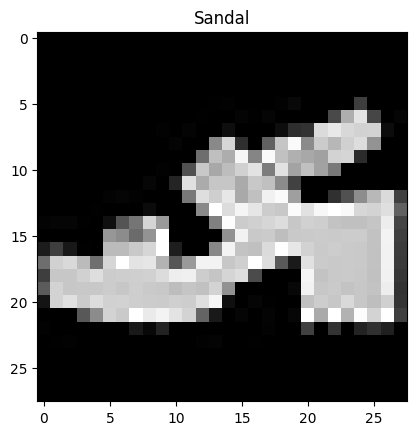

In [47]:
plt.imshow(testSamples[0].squeeze(), cmap="gray")
plt.title(classNames[testLabels[0]]);

In [48]:
# Making predictions
predProbs = makePredictions(model=model2, data=testSamples)

In [49]:
predClasses = predProbs.argmax(dim=1)
predClasses

tensor([5, 1, 7, 4, 3, 6, 4, 7, 1])

In [50]:
testLabels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

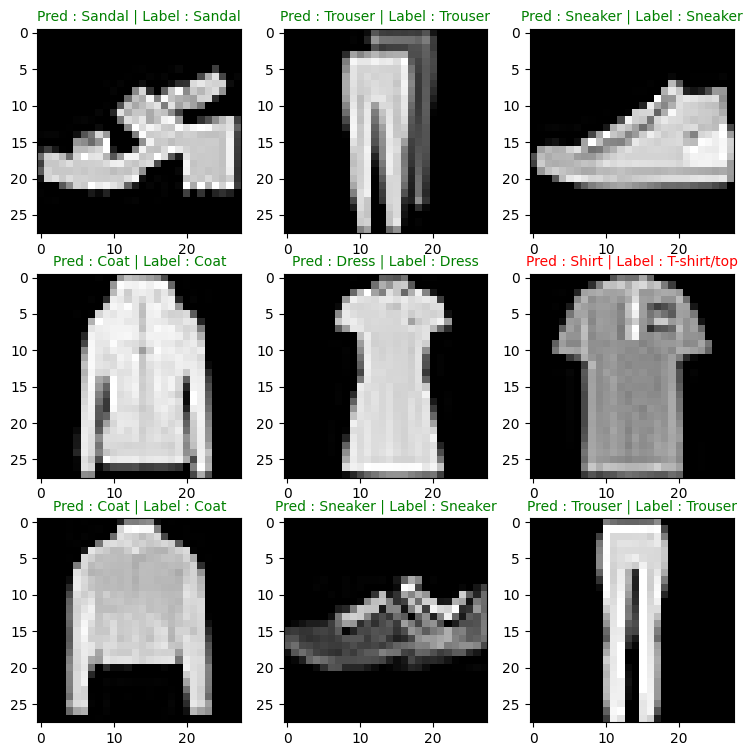

In [51]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(testSamples):
  plt.subplot(nrows,ncols,i+1)

  plt.imshow(sample.squeeze(),cmap="gray")

  predLabel = classNames[predClasses[i]]

  actualLabel = classNames[testLabels[i]]

  titleText = f"Pred : {predLabel} | Label : {actualLabel}"

  if predLabel == actualLabel:
    c = "g"
  else:
    c = "r"

  plt.title(titleText, fontsize=10, c=c)

## Model evaluation metrics

In [52]:
import mlxtend

In [53]:
mlxtend.__version__

'0.14.0'

In [54]:
from tqdm.auto import tqdm

# make predictions 
yPreds = []
model2.eval()

with torch.inference_mode():
  for X, y in tqdm(testDataloader, desc="Making predictions..."):

    X, y = X.to(device), y.to(device)

    yLogit = model2(X)

    yPred = torch.softmax(yLogit.squeeze(),dim=0).argmax(dim=1)

    yPreds.append(yPred.cpu())

  #print(yPreds)
  yPredTensor = torch.cat(yPreds)
  yPredTensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [55]:
try:
  import torchmetrics, mlxtend
  assert int (mlxtend.__version__.split(".")[1] >= 19, "mlxtend should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -q mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.14.0


In [58]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

cm = ConfusionMatrix(num_classes=len(classNames),task="multiclass")
cmTensor = cm(preds=yPredTensor, target=testDataset.targets)

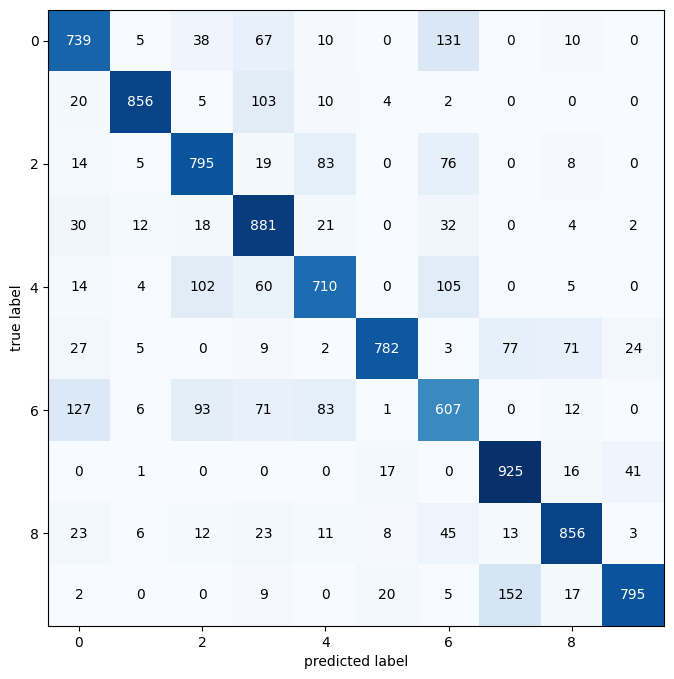

In [61]:
fig, ax = plot_confusion_matrix(conf_mat=cmTensor.numpy(),figsize=(10,8))

## Save and load best model

In [62]:
from pathlib import Path

# Model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "FashionMNISTMODEL.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/FashionMNISTMODEL.pth')

In [63]:
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/FashionMNISTMODEL.pth


In [64]:
torch.manual_seed(42)

loadedModel = TimsFashionMNISTModelV2(inputShape=1,hiddenUnits=10,outputShape=len(classNames))

loadedModel.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loadedModel.to(device)

TimsFashionMNISTModelV2(
  (convBlock1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convBlock2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [65]:
torch.manual_seed(42)

loadedModelResults = evalModel(
  loadedModel,testDataloader, lossFn, accuracy
)

In [66]:
loadedModelResults

{'modelName': 'TimsFashionMNISTModelV2',
 'modelLoss': 0.3023263216018677,
 'modelAcc': 0.8938698172569275}

In [67]:
torch.isclose(torch.tensor(model2Results["modelLoss"]), torch.tensor(loadedModelResults["modelLoss"]),atol=1e-02)

tensor(True)